## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9566736	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9378739	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9189575	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9036472	total: 61.9ms	remaining: 15.4s
4:	learn: 0.8875400	total: 63ms	remaining: 12.5s
5:	learn: 0.8712156	total: 64ms	remaining: 10.6s
6:	learn: 0.8557262	total: 65.1ms	remaining: 9.23s
7:	learn: 0.8406689	total: 66ms	remaining: 8.19s
8:	learn: 0.8263517	total: 67ms	remaining: 7.38s
9:	learn: 0.8119056	total: 67.9ms	remaining: 6.72s
10:	learn: 0.7974377	total: 68.8ms	remaining: 6.19s
11:	learn: 0.7829226	total: 69.7ms	remaining: 5.74s
12:	learn: 0.7684408	total: 70.6ms	remaining: 5.36s
13:	learn: 0.7547186	total: 71.5ms	remaining: 5.03s
14:	learn: 0.7432879	total: 72.4ms	remaining: 4.75s
15:	learn: 0.7290189	total: 73.2ms	remaining: 4.5s
16:	learn: 0.7175678	total: 74.1ms	remaining: 4.29s
17:	learn: 0.7059070	total: 75ms	remaining: 4.09s
18:	learn: 0.6939039	total: 75.8ms	remaining: 3.92s
19:

59:	learn: 0.4200428	total: 109ms	remaining: 1.71s
60:	learn: 0.4165481	total: 110ms	remaining: 1.69s
61:	learn: 0.4123788	total: 110ms	remaining: 1.67s
62:	learn: 0.4087110	total: 111ms	remaining: 1.65s
63:	learn: 0.4053071	total: 112ms	remaining: 1.64s
64:	learn: 0.4019224	total: 113ms	remaining: 1.62s
65:	learn: 0.3990057	total: 114ms	remaining: 1.61s
66:	learn: 0.3946206	total: 114ms	remaining: 1.59s
67:	learn: 0.3915110	total: 115ms	remaining: 1.58s
68:	learn: 0.3883431	total: 116ms	remaining: 1.56s
69:	learn: 0.3852920	total: 117ms	remaining: 1.55s
70:	learn: 0.3817900	total: 118ms	remaining: 1.54s
71:	learn: 0.3794294	total: 118ms	remaining: 1.53s
72:	learn: 0.3769278	total: 119ms	remaining: 1.51s
73:	learn: 0.3742940	total: 121ms	remaining: 1.51s
74:	learn: 0.3718350	total: 121ms	remaining: 1.5s
75:	learn: 0.3697811	total: 122ms	remaining: 1.49s
76:	learn: 0.3672883	total: 123ms	remaining: 1.48s
77:	learn: 0.3640458	total: 124ms	remaining: 1.46s
78:	learn: 0.3607142	total: 125m

159:	learn: 0.2509101	total: 191ms	remaining: 1s
160:	learn: 0.2500356	total: 192ms	remaining: 1s
161:	learn: 0.2493808	total: 193ms	remaining: 999ms
162:	learn: 0.2486164	total: 194ms	remaining: 996ms
163:	learn: 0.2480209	total: 195ms	remaining: 994ms
164:	learn: 0.2474730	total: 196ms	remaining: 991ms
165:	learn: 0.2467830	total: 197ms	remaining: 991ms
166:	learn: 0.2463078	total: 198ms	remaining: 988ms
167:	learn: 0.2455574	total: 199ms	remaining: 986ms
168:	learn: 0.2449641	total: 200ms	remaining: 983ms
169:	learn: 0.2442056	total: 201ms	remaining: 980ms
170:	learn: 0.2435432	total: 202ms	remaining: 977ms
171:	learn: 0.2426909	total: 203ms	remaining: 975ms
172:	learn: 0.2420099	total: 203ms	remaining: 972ms
173:	learn: 0.2411460	total: 204ms	remaining: 969ms
174:	learn: 0.2404558	total: 205ms	remaining: 966ms
175:	learn: 0.2398034	total: 206ms	remaining: 963ms
176:	learn: 0.2389417	total: 207ms	remaining: 961ms
177:	learn: 0.2384876	total: 207ms	remaining: 958ms
178:	learn: 0.2378

288:	learn: 0.1858022	total: 299ms	remaining: 735ms
289:	learn: 0.1856820	total: 300ms	remaining: 734ms
290:	learn: 0.1855382	total: 300ms	remaining: 732ms
291:	learn: 0.1849286	total: 301ms	remaining: 730ms
292:	learn: 0.1848307	total: 302ms	remaining: 729ms
293:	learn: 0.1843243	total: 303ms	remaining: 728ms
294:	learn: 0.1836786	total: 304ms	remaining: 726ms
295:	learn: 0.1831802	total: 305ms	remaining: 724ms
296:	learn: 0.1826935	total: 305ms	remaining: 723ms
297:	learn: 0.1824016	total: 306ms	remaining: 722ms
298:	learn: 0.1818401	total: 307ms	remaining: 720ms
299:	learn: 0.1812174	total: 308ms	remaining: 719ms
300:	learn: 0.1806913	total: 309ms	remaining: 717ms
301:	learn: 0.1802835	total: 310ms	remaining: 716ms
302:	learn: 0.1800909	total: 311ms	remaining: 715ms
303:	learn: 0.1797039	total: 312ms	remaining: 713ms
304:	learn: 0.1793010	total: 312ms	remaining: 712ms
305:	learn: 0.1791957	total: 313ms	remaining: 710ms
306:	learn: 0.1790595	total: 314ms	remaining: 709ms
307:	learn: 

386:	learn: 0.1525830	total: 381ms	remaining: 604ms
387:	learn: 0.1522390	total: 382ms	remaining: 603ms
388:	learn: 0.1518874	total: 383ms	remaining: 602ms
389:	learn: 0.1516770	total: 384ms	remaining: 601ms
390:	learn: 0.1515183	total: 385ms	remaining: 600ms
391:	learn: 0.1511743	total: 386ms	remaining: 598ms
392:	learn: 0.1507941	total: 387ms	remaining: 597ms
393:	learn: 0.1503753	total: 387ms	remaining: 596ms
394:	learn: 0.1502814	total: 388ms	remaining: 595ms
395:	learn: 0.1500724	total: 389ms	remaining: 593ms
396:	learn: 0.1499959	total: 390ms	remaining: 592ms
397:	learn: 0.1497098	total: 391ms	remaining: 591ms
398:	learn: 0.1495829	total: 391ms	remaining: 590ms
399:	learn: 0.1492563	total: 392ms	remaining: 588ms
400:	learn: 0.1490350	total: 393ms	remaining: 587ms
401:	learn: 0.1486666	total: 394ms	remaining: 586ms
402:	learn: 0.1483590	total: 395ms	remaining: 585ms
403:	learn: 0.1480148	total: 396ms	remaining: 584ms
404:	learn: 0.1475933	total: 396ms	remaining: 582ms
405:	learn: 

514:	learn: 0.1200941	total: 488ms	remaining: 460ms
515:	learn: 0.1198328	total: 489ms	remaining: 459ms
516:	learn: 0.1196086	total: 490ms	remaining: 458ms
517:	learn: 0.1193673	total: 491ms	remaining: 457ms
518:	learn: 0.1191305	total: 491ms	remaining: 455ms
519:	learn: 0.1189229	total: 493ms	remaining: 455ms
520:	learn: 0.1186489	total: 494ms	remaining: 454ms
521:	learn: 0.1184628	total: 495ms	remaining: 453ms
522:	learn: 0.1182662	total: 495ms	remaining: 452ms
523:	learn: 0.1182028	total: 496ms	remaining: 451ms
524:	learn: 0.1180817	total: 497ms	remaining: 450ms
525:	learn: 0.1177481	total: 498ms	remaining: 449ms
526:	learn: 0.1175988	total: 499ms	remaining: 448ms
527:	learn: 0.1173796	total: 500ms	remaining: 447ms
528:	learn: 0.1171906	total: 501ms	remaining: 446ms
529:	learn: 0.1170892	total: 501ms	remaining: 445ms
530:	learn: 0.1169437	total: 502ms	remaining: 444ms
531:	learn: 0.1167107	total: 503ms	remaining: 442ms
532:	learn: 0.1165136	total: 504ms	remaining: 441ms
533:	learn: 

610:	learn: 0.1024576	total: 571ms	remaining: 364ms
611:	learn: 0.1022682	total: 572ms	remaining: 363ms
612:	learn: 0.1020687	total: 573ms	remaining: 362ms
613:	learn: 0.1019463	total: 574ms	remaining: 361ms
614:	learn: 0.1017626	total: 575ms	remaining: 360ms
615:	learn: 0.1016135	total: 576ms	remaining: 359ms
616:	learn: 0.1014655	total: 577ms	remaining: 358ms
617:	learn: 0.1013240	total: 577ms	remaining: 357ms
618:	learn: 0.1011683	total: 578ms	remaining: 356ms
619:	learn: 0.1009522	total: 579ms	remaining: 355ms
620:	learn: 0.1007053	total: 580ms	remaining: 354ms
621:	learn: 0.1005630	total: 581ms	remaining: 353ms
622:	learn: 0.1003581	total: 581ms	remaining: 352ms
623:	learn: 0.1000839	total: 582ms	remaining: 351ms
624:	learn: 0.0999172	total: 583ms	remaining: 350ms
625:	learn: 0.0998180	total: 584ms	remaining: 349ms
626:	learn: 0.0996011	total: 585ms	remaining: 348ms
627:	learn: 0.0994960	total: 585ms	remaining: 347ms
628:	learn: 0.0993536	total: 586ms	remaining: 346ms
629:	learn: 

739:	learn: 0.0840463	total: 678ms	remaining: 238ms
740:	learn: 0.0839646	total: 679ms	remaining: 237ms
741:	learn: 0.0839383	total: 681ms	remaining: 237ms
742:	learn: 0.0837853	total: 681ms	remaining: 236ms
743:	learn: 0.0836852	total: 682ms	remaining: 235ms
744:	learn: 0.0836600	total: 683ms	remaining: 234ms
745:	learn: 0.0835651	total: 684ms	remaining: 233ms
746:	learn: 0.0835423	total: 685ms	remaining: 232ms
747:	learn: 0.0835058	total: 686ms	remaining: 231ms
748:	learn: 0.0833140	total: 687ms	remaining: 230ms
749:	learn: 0.0831027	total: 687ms	remaining: 229ms
750:	learn: 0.0829305	total: 688ms	remaining: 228ms
751:	learn: 0.0828313	total: 689ms	remaining: 227ms
752:	learn: 0.0826915	total: 690ms	remaining: 226ms
753:	learn: 0.0825907	total: 691ms	remaining: 225ms
754:	learn: 0.0824319	total: 692ms	remaining: 224ms
755:	learn: 0.0822614	total: 692ms	remaining: 223ms
756:	learn: 0.0820501	total: 693ms	remaining: 222ms
757:	learn: 0.0820229	total: 695ms	remaining: 222ms
758:	learn: 

837:	learn: 0.0734388	total: 762ms	remaining: 147ms
838:	learn: 0.0733434	total: 763ms	remaining: 146ms
839:	learn: 0.0732312	total: 764ms	remaining: 145ms
840:	learn: 0.0731792	total: 765ms	remaining: 145ms
841:	learn: 0.0730196	total: 765ms	remaining: 144ms
842:	learn: 0.0729101	total: 766ms	remaining: 143ms
843:	learn: 0.0728549	total: 767ms	remaining: 142ms
844:	learn: 0.0727218	total: 768ms	remaining: 141ms
845:	learn: 0.0727030	total: 769ms	remaining: 140ms
846:	learn: 0.0726433	total: 770ms	remaining: 139ms
847:	learn: 0.0725278	total: 770ms	remaining: 138ms
848:	learn: 0.0725112	total: 771ms	remaining: 137ms
849:	learn: 0.0724782	total: 773ms	remaining: 136ms
850:	learn: 0.0722919	total: 773ms	remaining: 135ms
851:	learn: 0.0722216	total: 774ms	remaining: 134ms
852:	learn: 0.0721462	total: 775ms	remaining: 134ms
853:	learn: 0.0720299	total: 776ms	remaining: 133ms
854:	learn: 0.0719165	total: 777ms	remaining: 132ms
855:	learn: 0.0718446	total: 778ms	remaining: 131ms
856:	learn: 

965:	learn: 0.0631568	total: 869ms	remaining: 30.6ms
966:	learn: 0.0631153	total: 870ms	remaining: 29.7ms
967:	learn: 0.0630304	total: 871ms	remaining: 28.8ms
968:	learn: 0.0629616	total: 872ms	remaining: 27.9ms
969:	learn: 0.0629040	total: 873ms	remaining: 27ms
970:	learn: 0.0628091	total: 874ms	remaining: 26.1ms
971:	learn: 0.0627259	total: 875ms	remaining: 25.2ms
972:	learn: 0.0626081	total: 875ms	remaining: 24.3ms
973:	learn: 0.0624723	total: 876ms	remaining: 23.4ms
974:	learn: 0.0624278	total: 877ms	remaining: 22.5ms
975:	learn: 0.0623973	total: 878ms	remaining: 21.6ms
976:	learn: 0.0622528	total: 879ms	remaining: 20.7ms
977:	learn: 0.0621500	total: 879ms	remaining: 19.8ms
978:	learn: 0.0620728	total: 880ms	remaining: 18.9ms
979:	learn: 0.0619690	total: 881ms	remaining: 18ms
980:	learn: 0.0619309	total: 882ms	remaining: 17.1ms
981:	learn: 0.0618589	total: 883ms	remaining: 16.2ms
982:	learn: 0.0617996	total: 884ms	remaining: 15.3ms
983:	learn: 0.0617493	total: 884ms	remaining: 14.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

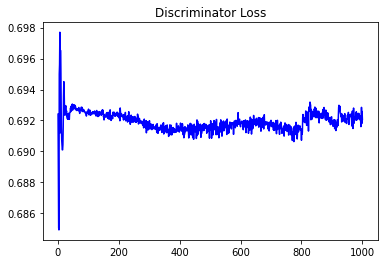

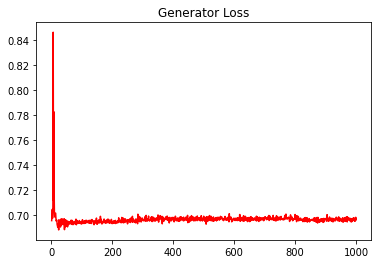

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15236838725384064


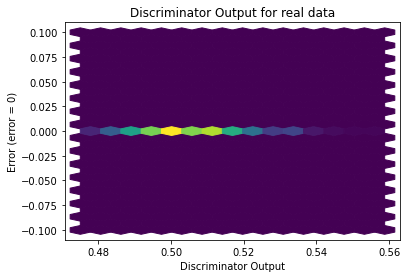

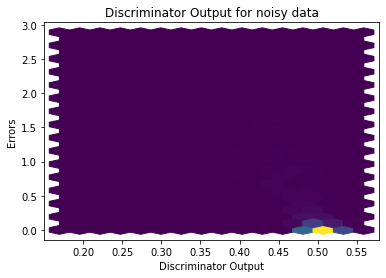

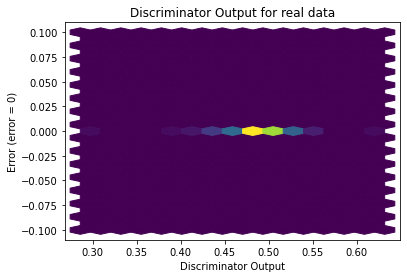

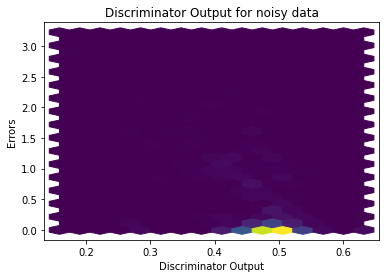

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


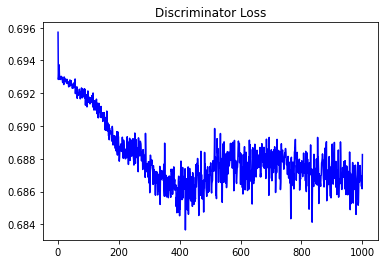

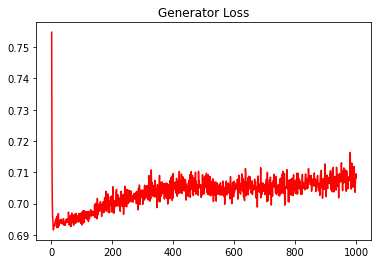

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13470997140435245


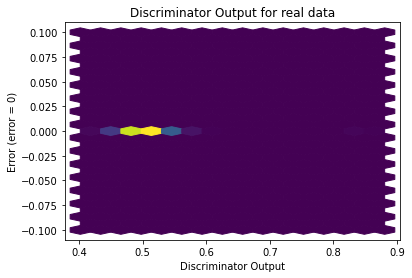

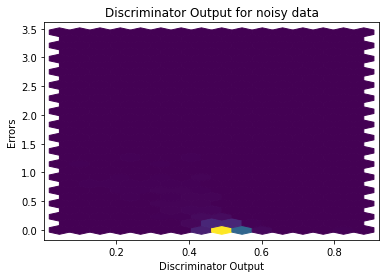

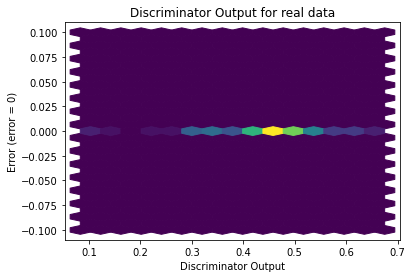

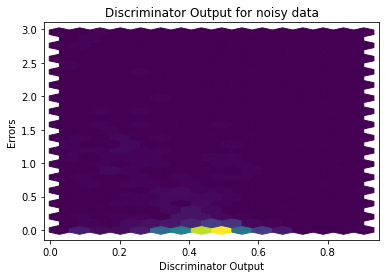

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9589]], requires_grad=True)
